In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import time

In [3]:
base_url = "https://www.setopati.com"

In [4]:
categories = {
    "politics": "https://www.setopati.com/politics",
    "kinmel": "https://www.setopati.com/kinmel",
    "nepali-brand": "https://www.setopati.com/nepali-brand",
    "bichar": "https://www.setopati.com/bichar",
    "samaj": "https://www.setopati.com/samaj",
    "art": "https://www.setopati.com/art",
    "blog": "https://www.setopati.com/blog",
    "sports": "https://www.setopati.com/sports",
    "global": "https://www.setopati.com/global"
}


In [5]:
#headers = {"User-Agent": "Mozilla/5.0"}

In [6]:
data = []

for category_name, base_url in categories.items():
    print(f"\nScraping category: {category_name}")
    
    for page in range(1, 4):   # Scrape 3 pages
        url = f"{base_url}?page={page}"
        print(f"Page: {page}")
        
        response = requests.get(url) #, headers=headers
        soup = BeautifulSoup(response.text, "html.parser")
        
        links = soup.find_all("a", href=True)
        
        article_links = []
        for link in links:
            href = link['href']
            if href.startswith("https://www.setopati.com/") and href.count("/") > 3:
                article_links.append(href)
        
        article_links = list(set(article_links))
        
        for article_url in article_links:
            try:
                article_res = requests.get(article_url)                         # , headers=headers
                article_soup = BeautifulSoup(article_res.text, "html.parser")
                
                headline_tag = article_soup.find("h1")
                headline = headline_tag.text.strip() if headline_tag else ""
                
                paragraphs = article_soup.find_all("p")
                content = " ".join([p.text.strip() for p in paragraphs])
                
                if len(content) > 200:  # Avoid empty content
                    data.append([category_name, headline, content])
                
                time.sleep(1)
                
            except:
                continue


Scraping category: politics
Page: 1
Page: 2
Page: 3

Scraping category: kinmel
Page: 1
Page: 2
Page: 3

Scraping category: nepali-brand
Page: 1
Page: 2
Page: 3

Scraping category: bichar
Page: 1
Page: 2
Page: 3

Scraping category: samaj
Page: 1
Page: 2
Page: 3

Scraping category: art
Page: 1
Page: 2
Page: 3

Scraping category: blog
Page: 1
Page: 2
Page: 3

Scraping category: sports
Page: 1
Page: 2
Page: 3

Scraping category: global
Page: 1
Page: 2
Page: 3


In [7]:
df = pd.DataFrame(data, columns=["Category", "Headline", "Content"])
df.to_csv("Setopati_news_Data.csv", index=False)

In [8]:
df.head()

,Category,Headline,Content
0,politics,कांग्रेसले सार्‍यो घोषणापत्र सार्वजनिक गर्ने मिति,नेपाली कांग्रेसले आगामी निर्वाचनका लागि घोषणा ...
1,politics,नेकपाले निर्वाचन आयोगमा पेस गर्‍यो घोषणापत्र,नेपाली कम्युनिस्ट पार्टी (नेकपा)ले प्रतिनिधि स...
2,politics,सम्पर्क,"Last Updated: 2025-09-17 At Setopati (“we,” “u..."
3,politics,बुटवललाई आर्थिक हब बनाउन व्यवसायीहरूले गरे विष...,बुटवलका उद्योगी तथा व्यवसायीहरूले बुटवलको आर्थ...
4,politics,सरकारको नेतृत्व गर्नेगरी राजनीतिमा आएका हौं- क...,उज्यालो नेपाल पार्टीका अध्यक्ष कुलमान घिसिङले ...


In [9]:
df["Category"].unique()

array(['politics', 'kinmel', 'nepali-brand', 'art', 'blog', 'sports',
       'global'], dtype=object)

In [10]:
print(len(df))

670


In [11]:
df.shape

(670, 3)

In [12]:
df['Category'].value_counts()

Category
politics        96
kinmel          96
nepali-brand    96
global          96
sports          96
blog            95
art             95
Name: count, dtype: int64

In [13]:
df['Content'][4]

'उज्यालो नेपाल पार्टीका अध्यक्ष कुलमान घिसिङले आफूहरूले सरकारको नेतृत्व गर्न चाहेको बताएका छन्।\xa0आइतबार काठमाडौंमा पार्टीको चुनावी घोषणा सार्वजनिक गर्दै उनले सरकारको नेतृत्व गर्नका लागि नै राजनीति गरिएको बताए।\xa0अध्यक्ष घिसिङले सिंगै देशको समस्या समाधानका लागि संसदमा रहेर पनि आफ्नो पार्टीले सशक्त आवाज उठाउने बताए।\xa0उनले सरकारमा गएपछि पार्टीले चुनावी घोषणा पत्रमा उल्लेख गरिएका अनुसारको काम गर्ने समेत बताए।\xa0\xa0अध्यक्ष घिसिङले भने, ‘सबैले राजनीति गर्ने भनेको फेरि\xa0पनि सरकारको नेतृत्व गर्नका लागि नै हो। र त्यो सँगसँगै समाजमा देखिएका र देशको समस्यालाई समग्रमा विपक्षमा बसेर पनि र संसदको एउटा सशक्त प्रतिनिधि भएर पनि धेरैले धेरै आवाज उठाइरहेको हुन्छ। अब सरकारको नेतृत्व गर्नका लागि नै राजनीतिक दल खोलेको हुन्छ। राजनीतिमा आएको हुन्छ। त्यो नेतृत्व गर्नका लागि हामी सरकारमा जान्छौँ। र यो यो प्रतिबद्धता पूरा गर्छौं भनेर भन्छौँ।’अध्यक्ष घिसिङले मुलुकको समृद्धिका लागि जलविद्युतको उत्पादनमा जोड दिइएको समेत बताए।\xa0 —न्युज एजेन्सी नेपाल आइतबार काठमाडौंमा पार्टीको चुनावी घोषणा सार्वजनिक गर्दै 

In [14]:
import nltk
from nltk.corpus import stopwords

# 2. Perform data cleaning and preprocessing specific to Nepali-language text.

In [15]:
import re

In [16]:
def clean_text(text):

    text = str(text)

    # remove zero-width
    text = re.sub(r'\u200c|\u200b|\ufeff', '', text)

    # keep Nepali Words only
    text = re.sub(r'[0-9०-९]', '', text)  
    
    # remove digits/ unwanted characters (keep Nepali unicode)
    text = re.sub(r'[^\u0900-\u097F\s]', ' ', text)  
    
    # normalize spaces
    text = re.sub(r'\s+', ' ', text)   
    
    return text.strip()
    
   
    

In [17]:
df["clean_text"] = df["Content"].apply(clean_text)

In [18]:
df.head()

,Category,Headline,Content,clean_text
0,politics,कांग्रेसले सार्‍यो घोषणापत्र सार्वजनिक गर्ने मिति,नेपाली कांग्रेसले आगामी निर्वाचनका लागि घोषणा ...,नेपाली कांग्रेसले आगामी निर्वाचनका लागि घोषणा ...
1,politics,नेकपाले निर्वाचन आयोगमा पेस गर्‍यो घोषणापत्र,नेपाली कम्युनिस्ट पार्टी (नेकपा)ले प्रतिनिधि स...,नेपाली कम्युनिस्ट पार्टी नेकपा ले प्रतिनिधि सभ...
2,politics,सम्पर्क,"Last Updated: 2025-09-17 At Setopati (“we,” “u...",
3,politics,बुटवललाई आर्थिक हब बनाउन व्यवसायीहरूले गरे विष...,बुटवलका उद्योगी तथा व्यवसायीहरूले बुटवलको आर्थ...,बुटवलका उद्योगी तथा व्यवसायीहरूले बुटवलको आर्थ...
4,politics,सरकारको नेतृत्व गर्नेगरी राजनीतिमा आएका हौं- क...,उज्यालो नेपाल पार्टीका अध्यक्ष कुलमान घिसिङले ...,उज्यालो नेपाल पार्टीका अध्यक्ष कुलमान घिसिङले ...


# 3. Implement feature engineering techniques (tokenization, normalization, embeddings, etc.).

## 3.1 tokenization

In [19]:
def nepali_tokenize(text):
    return text.split()

df["tokens"] = df["clean_text"].apply(nepali_tokenize)


In [20]:
df.head()

,Category,Headline,Content,clean_text,tokens
0,politics,कांग्रेसले सार्‍यो घोषणापत्र सार्वजनिक गर्ने मिति,नेपाली कांग्रेसले आगामी निर्वाचनका लागि घोषणा ...,नेपाली कांग्रेसले आगामी निर्वाचनका लागि घोषणा ...,"[नेपाली, कांग्रेसले, आगामी, निर्वाचनका, लागि, ..."
1,politics,नेकपाले निर्वाचन आयोगमा पेस गर्‍यो घोषणापत्र,नेपाली कम्युनिस्ट पार्टी (नेकपा)ले प्रतिनिधि स...,नेपाली कम्युनिस्ट पार्टी नेकपा ले प्रतिनिधि सभ...,"[नेपाली, कम्युनिस्ट, पार्टी, नेकपा, ले, प्रतिन..."
2,politics,सम्पर्क,"Last Updated: 2025-09-17 At Setopati (“we,” “u...",,[]
3,politics,बुटवललाई आर्थिक हब बनाउन व्यवसायीहरूले गरे विष...,बुटवलका उद्योगी तथा व्यवसायीहरूले बुटवलको आर्थ...,बुटवलका उद्योगी तथा व्यवसायीहरूले बुटवलको आर्थ...,"[बुटवलका, उद्योगी, तथा, व्यवसायीहरूले, बुटवलको..."
4,politics,सरकारको नेतृत्व गर्नेगरी राजनीतिमा आएका हौं- क...,उज्यालो नेपाल पार्टीका अध्यक्ष कुलमान घिसिङले ...,उज्यालो नेपाल पार्टीका अध्यक्ष कुलमान घिसिङले ...,"[उज्यालो, नेपाल, पार्टीका, अध्यक्ष, कुलमान, घि..."


## 3.2- Remove Stopwords

In [21]:
nepali_stop_words = set(stopwords.words('nepali'))
print(nepali_stop_words)

{'कसरी', 'पाँचौं', 'जान', 'आदि', 'एकदम', 'पाँच', 'तिर', 'बरु', 'रूप', 'गर्नुपर्छ', 'पटक', 'छ', 'देखि', 'भन्नुभयो', 'कहिलेकाहीं', 'गर्छ', 'सट्टा', 'जस्तो', 'अनुसार', 'यद्यपि', 'जाहिर', 'बिरुद्ध', 'कसैले', 'बारे', 'तुरुन्तै', 'नजिकै', 'सही', 'दिनुहुन्छ', 'कृपया', 'पछिल्लो', 'यसपछि', 'गर्नु', 'यो', 'अन्तर्गत', 'यस', 'उहालाई', 'कसै', 'गए', 'तिनी', 'दिनुभएको', 'माथि', 'सबै', 'हरेक', 'एक', 'कि', 'निम्ति', 'सायद', 'अरु', 'अन्यथा', 'अर्थात', 'तिमी', 'निम्न', 'पछि', 'ओठ', 'कुरा', 'दुई', 'को', 'जस्तोसुकै', 'देखे', 'दिए', 'मुख्य', 'चाहिए', 'बीच', 'तथा', 'प्रति', 'हुने', 'कहाँबाट', 'आफूलाई', 'देखियो', 'मलाई', 'देखेको', 'तदनुसार', 'र', 'यसो', 'यसरी', 'हुन', 'हुन्', 'भने', 'तेस्कारण', 'उनले', 'आए', 'आत्म', 'तल', 'न', 'आफ्नै', 'कम से कम', 'तिनिहरुलाई', 'राखे', 'अर्थात्', 'अलग', 'राख्छ', 'का', 'सबैलाई', 'थियो', 'चार', 'नि', 'थिएन', 'नयाँ', 'राम्रो', 'तिनीहरुको', 'आयो', 'उदाहरण', 'तिनीहरू', 'बिशेष', 'भएको', 'वरीपरी', 'सधै', 'रही', 'भर', 'संगै', 'चाले', 'कुनै', 'पूर्व', 'धेरै', 'चाहन्छु', 'बीचमा', 'नत्र

In [22]:
def remove_stopwords(tokens):
    return [word for word in tokens if word not in nepali_stop_words]

df["tokens_clean"] = df["tokens"].apply(remove_stopwords)

In [23]:
df.head()

,Category,Headline,Content,clean_text,tokens,tokens_clean
0,politics,कांग्रेसले सार्‍यो घोषणापत्र सार्वजनिक गर्ने मिति,नेपाली कांग्रेसले आगामी निर्वाचनका लागि घोषणा ...,नेपाली कांग्रेसले आगामी निर्वाचनका लागि घोषणा ...,"[नेपाली, कांग्रेसले, आगामी, निर्वाचनका, लागि, ...","[नेपाली, कांग्रेसले, आगामी, निर्वाचनका, घोषणा,..."
1,politics,नेकपाले निर्वाचन आयोगमा पेस गर्‍यो घोषणापत्र,नेपाली कम्युनिस्ट पार्टी (नेकपा)ले प्रतिनिधि स...,नेपाली कम्युनिस्ट पार्टी नेकपा ले प्रतिनिधि सभ...,"[नेपाली, कम्युनिस्ट, पार्टी, नेकपा, ले, प्रतिन...","[नेपाली, कम्युनिस्ट, पार्टी, नेकपा, प्रतिनिधि,..."
2,politics,सम्पर्क,"Last Updated: 2025-09-17 At Setopati (“we,” “u...",,[],[]
3,politics,बुटवललाई आर्थिक हब बनाउन व्यवसायीहरूले गरे विष...,बुटवलका उद्योगी तथा व्यवसायीहरूले बुटवलको आर्थ...,बुटवलका उद्योगी तथा व्यवसायीहरूले बुटवलको आर्थ...,"[बुटवलका, उद्योगी, तथा, व्यवसायीहरूले, बुटवलको...","[बुटवलका, उद्योगी, व्यवसायीहरूले, बुटवलको, आर्..."
4,politics,सरकारको नेतृत्व गर्नेगरी राजनीतिमा आएका हौं- क...,उज्यालो नेपाल पार्टीका अध्यक्ष कुलमान घिसिङले ...,उज्यालो नेपाल पार्टीका अध्यक्ष कुलमान घिसिङले ...,"[उज्यालो, नेपाल, पार्टीका, अध्यक्ष, कुलमान, घि...","[उज्यालो, नेपाल, पार्टीका, अध्यक्ष, कुलमान, घि..."


In [24]:
df['tokens_clean'].head()

0    [नेपाली, कांग्रेसले, आगामी, निर्वाचनका, घोषणा,...
1    [नेपाली, कम्युनिस्ट, पार्टी, नेकपा, प्रतिनिधि,...
2                                                   []
3    [बुटवलका, उद्योगी, व्यवसायीहरूले, बुटवलको, आर्...
4    [उज्यालो, नेपाल, पार्टीका, अध्यक्ष, कुलमान, घि...
Name: tokens_clean, dtype: object

### Find final Clean text

In [25]:
df["final_text"] = df["tokens_clean"].apply(lambda x: " ".join(x))

In [26]:
df.head()

,Category,Headline,Content,clean_text,tokens,tokens_clean,final_text
0,politics,कांग्रेसले सार्‍यो घोषणापत्र सार्वजनिक गर्ने मिति,नेपाली कांग्रेसले आगामी निर्वाचनका लागि घोषणा ...,नेपाली कांग्रेसले आगामी निर्वाचनका लागि घोषणा ...,"[नेपाली, कांग्रेसले, आगामी, निर्वाचनका, लागि, ...","[नेपाली, कांग्रेसले, आगामी, निर्वाचनका, घोषणा,...",नेपाली कांग्रेसले आगामी निर्वाचनका घोषणा सार्व...
1,politics,नेकपाले निर्वाचन आयोगमा पेस गर्‍यो घोषणापत्र,नेपाली कम्युनिस्ट पार्टी (नेकपा)ले प्रतिनिधि स...,नेपाली कम्युनिस्ट पार्टी नेकपा ले प्रतिनिधि सभ...,"[नेपाली, कम्युनिस्ट, पार्टी, नेकपा, ले, प्रतिन...","[नेपाली, कम्युनिस्ट, पार्टी, नेकपा, प्रतिनिधि,...",नेपाली कम्युनिस्ट पार्टी नेकपा प्रतिनिधि सभा न...
2,politics,सम्पर्क,"Last Updated: 2025-09-17 At Setopati (“we,” “u...",,[],[],
3,politics,बुटवललाई आर्थिक हब बनाउन व्यवसायीहरूले गरे विष...,बुटवलका उद्योगी तथा व्यवसायीहरूले बुटवलको आर्थ...,बुटवलका उद्योगी तथा व्यवसायीहरूले बुटवलको आर्थ...,"[बुटवलका, उद्योगी, तथा, व्यवसायीहरूले, बुटवलको...","[बुटवलका, उद्योगी, व्यवसायीहरूले, बुटवलको, आर्...",बुटवलका उद्योगी व्यवसायीहरूले बुटवलको आर्थिक भ...
4,politics,सरकारको नेतृत्व गर्नेगरी राजनीतिमा आएका हौं- क...,उज्यालो नेपाल पार्टीका अध्यक्ष कुलमान घिसिङले ...,उज्यालो नेपाल पार्टीका अध्यक्ष कुलमान घिसिङले ...,"[उज्यालो, नेपाल, पार्टीका, अध्यक्ष, कुलमान, घि...","[उज्यालो, नेपाल, पार्टीका, अध्यक्ष, कुलमान, घि...",उज्यालो नेपाल पार्टीका अध्यक्ष कुलमान घिसिङले ...


In [27]:
df['final_text'][0]

'नेपाली कांग्रेसले आगामी निर्वाचनका घोषणा सार्वजनिक मिति परिवर्तन छ।कांग्रेसले आइतबार घोषणा पत्र सार्वजनिक भनेको थियो।शनिबार अबेर सूचना जारी कांग्रेस प्रवक्ता देवराज चालिसेले आज भनिएको घोषणापत्र सार्वजनिक कार्यक्रम स्थगित जानकारी दिएका हुन्।निर्वाचन आयोगले दलहरूलाई फागुन गतेभित्र घोषणापत्र बुझाइसक्न भनेको छ।कांग्रेसले गते आयोगलाई बुझाउने गते मात्रै सार्वजनिक तय प्रवक्ता चालिसेले जारी विज्ञप्तीमा भनिएको छ।कांग्रेसले जनकपुरमा घोषणापत्र सार्वजनिक लागेको हो।कांग्रेसको मधेस प्रदेश कार्यसमितिले फागुन गते जनकपुरमा सभा गर्दैछ।सोही सभामा घोषणापत्र सार्वजनिक गरिने कांग्रेसले जनाएको छ।कांग्रेसले यसपालिको घोषणापत्रलाई प्रतिज्ञापत्र भनेको छ। कांग्रेसले आइतबार घोषणा पत्र सार्वजनिक भनेको थियो। शनिबार अबेर सूचना जारी कांग्रेस प्रवक्ता देवराज चालिसेले आज भनिएको घोषणापत्र सार्वजनिक कार्यक्रम स्थगित जानकारी दिएका हुन्। निर्वाचन आयोगले दलहरूलाई फागुन गतेभित्र घोषणापत्र बुझाइसक्न भनेको छ। कांग्रेसले गते आयोगलाई बुझाउने गते मात्रै सार्वजनिक तय प्रवक्ता चालिसेले जारी विज्ञप्तीमा भनिएको छ। कांग्रेसले जनकपुरमा

## 3.3- Embedding / Vectorization

In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [54]:
tfidf = TfidfVectorizer(
    max_features=10000,     # keep top 5k words, maximium features Prevents overfitting ..........
    ngram_range=(1, 2),    # It helps to Captures Nepali phrases (unigrams + bigrams)
    min_df=3,              # It helps to Removes noise----ignore very rare words
    max_df=0.9             # it helps to Removes overly common words-----ignore very frequent words, it helps to get accuracy
)

In [55]:
X = tfidf.fit_transform(df["final_text"])
y = df["Category"]

In [56]:
X

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 170601 stored elements and shape (670, 15000)>

In [57]:
y

0      politics
1      politics
2      politics
3      politics
4      politics
         ...   
665      global
666      global
667      global
668      global
669      global
Name: Category, Length: 670, dtype: object

# 4. Train Test Split

In [58]:
from sklearn.model_selection import train_test_split

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. Develop baseline models (e.g., Naive Bayes, Logistic Regression, SVM).

## 5.1- Naive Bayes

In [60]:
from sklearn.naive_bayes import MultinomialNB

In [61]:
from sklearn.metrics import accuracy_score, classification_report

In [62]:
nb_model = MultinomialNB() # create model
nb_model.fit(X_train, y_train) # fit train dataset into the model



MultinomialNB()

### predict

In [63]:
nb_pred = nb_model.predict(X_test)

In [64]:
nb_pred

array(['art', 'kinmel', 'blog', 'blog', 'nepali-brand', 'blog', 'blog',
       'nepali-brand', 'kinmel', 'blog', 'blog', 'nepali-brand', 'art',
       'nepali-brand', 'nepali-brand', 'kinmel', 'politics', 'blog',
       'blog', 'blog', 'blog', 'nepali-brand', 'art', 'blog', 'global',
       'sports', 'nepali-brand', 'global', 'blog', 'politics', 'blog',
       'sports', 'blog', 'blog', 'blog', 'nepali-brand', 'politics',
       'art', 'blog', 'global', 'global', 'art', 'blog', 'blog', 'sports',
       'global', 'global', 'blog', 'politics', 'nepali-brand', 'blog',
       'art', 'blog', 'sports', 'politics', 'global', 'nepali-brand',
       'art', 'blog', 'kinmel', 'kinmel', 'blog', 'blog', 'blog',
       'sports', 'nepali-brand', 'nepali-brand', 'politics', 'politics',
       'blog', 'blog', 'global', 'blog', 'blog', 'politics', 'blog',
       'art', 'kinmel', 'sports', 'nepali-brand', 'blog', 'blog',
       'sports', 'blog', 'global', 'blog', 'kinmel', 'art', 'politics',
       'sport

In [65]:
y_test

361             art
158          kinmel
480          sports
640          global
275    nepali-brand
           ...     
539          sports
420            blog
551          sports
212    nepali-brand
18         politics
Name: Category, Length: 134, dtype: object

In [66]:
print("Naive Bayes Accuracy:", accuracy_score(y_test, nb_pred))
print()
print(classification_report(y_test, nb_pred))

Naive Bayes Accuracy: 0.6417910447761194

              precision    recall  f1-score   support

         art       1.00      0.62      0.76        21
        blog       0.26      1.00      0.41        12
      global       0.91      0.48      0.62        21
      kinmel       0.70      0.37      0.48        19
nepali-brand       0.65      1.00      0.79        17
    politics       0.93      0.46      0.62        28
      sports       1.00      0.88      0.93        16

    accuracy                           0.64       134
   macro avg       0.78      0.69      0.66       134
weighted avg       0.82      0.64      0.66       134



## 5.2- Logistic Regression

In [67]:
from sklearn.linear_model import LogisticRegression

In [68]:
lr_model = LogisticRegression(max_iter=2000) ##  create model
lr_model.fit(X_train, y_train) # fit training data into the model


LogisticRegression(max_iter=2000)

### predict

In [69]:
lr_pred = lr_model.predict(X_test)

In [70]:
lr_pred

array(['art', 'kinmel', 'kinmel', 'global', 'nepali-brand', 'art', 'blog',
       'nepali-brand', 'kinmel', 'politics', 'blog', 'nepali-brand',
       'art', 'nepali-brand', 'nepali-brand', 'kinmel', 'politics',
       'blog', 'art', 'politics', 'kinmel', 'global', 'art', 'art',
       'kinmel', 'sports', 'nepali-brand', 'global', 'blog', 'politics',
       'blog', 'sports', 'blog', 'kinmel', 'kinmel', 'nepali-brand',
       'politics', 'art', 'kinmel', 'global', 'politics', 'art', 'kinmel',
       'blog', 'sports', 'global', 'global', 'kinmel', 'politics',
       'nepali-brand', 'politics', 'art', 'politics', 'sports',
       'politics', 'global', 'global', 'art', 'blog', 'kinmel', 'kinmel',
       'kinmel', 'kinmel', 'kinmel', 'sports', 'nepali-brand', 'global',
       'politics', 'politics', 'kinmel', 'politics', 'kinmel', 'kinmel',
       'blog', 'politics', 'politics', 'art', 'kinmel', 'sports',
       'global', 'blog', 'kinmel', 'sports', 'kinmel', 'global',
       'politics', 'k

In [71]:
y_test

361             art
158          kinmel
480          sports
640          global
275    nepali-brand
           ...     
539          sports
420            blog
551          sports
212    nepali-brand
18         politics
Name: Category, Length: 134, dtype: object

In [72]:
print("Logistic Regression Accuracy:", accuracy_score(y_test, lr_pred))
print()
print(classification_report(y_test, lr_pred))

Logistic Regression Accuracy: 0.8134328358208955

              precision    recall  f1-score   support

         art       1.00      0.76      0.86        21
        blog       0.71      1.00      0.83        12
      global       1.00      0.67      0.80        21
      kinmel       0.57      0.89      0.69        19
nepali-brand       0.84      0.94      0.89        17
    politics       0.83      0.71      0.77        28
      sports       1.00      0.88      0.93        16

    accuracy                           0.81       134
   macro avg       0.85      0.84      0.83       134
weighted avg       0.86      0.81      0.82       134



## 5.3- SVM

In [73]:
from sklearn.svm import LinearSVC

In [74]:
svm_model = LinearSVC() # create model
svm_model.fit(X_train, y_train) # fit training value into the model 

LinearSVC()

### predict

In [75]:
svm_pred = svm_model.predict(X_test)

In [76]:
svm_pred

array(['art', 'kinmel', 'kinmel', 'global', 'nepali-brand', 'art', 'blog',
       'nepali-brand', 'kinmel', 'politics', 'blog', 'nepali-brand',
       'art', 'nepali-brand', 'nepali-brand', 'kinmel', 'politics',
       'blog', 'art', 'politics', 'global', 'global', 'art', 'art',
       'global', 'sports', 'nepali-brand', 'global', 'blog', 'politics',
       'blog', 'sports', 'blog', 'kinmel', 'kinmel', 'nepali-brand',
       'politics', 'art', 'kinmel', 'global', 'global', 'art', 'kinmel',
       'blog', 'sports', 'global', 'global', 'kinmel', 'politics',
       'nepali-brand', 'sports', 'art', 'politics', 'sports', 'politics',
       'global', 'global', 'art', 'art', 'kinmel', 'kinmel', 'kinmel',
       'kinmel', 'kinmel', 'sports', 'nepali-brand', 'global', 'politics',
       'politics', 'global', 'politics', 'politics', 'kinmel', 'blog',
       'politics', 'politics', 'art', 'kinmel', 'sports', 'global',
       'blog', 'blog', 'sports', 'kinmel', 'global', 'politics', 'kinmel',
    

In [77]:
y_test

361             art
158          kinmel
480          sports
640          global
275    nepali-brand
           ...     
539          sports
420            blog
551          sports
212    nepali-brand
18         politics
Name: Category, Length: 134, dtype: object

In [78]:

print("SVM Accuracy:", accuracy_score(y_test, svm_pred))
print()
print(classification_report(y_test, svm_pred))

SVM Accuracy: 0.8208955223880597

              precision    recall  f1-score   support

         art       1.00      0.81      0.89        21
        blog       0.71      1.00      0.83        12
      global       0.84      0.76      0.80        21
      kinmel       0.58      0.74      0.65        19
nepali-brand       0.83      0.88      0.86        17
    politics       0.92      0.79      0.85        28
      sports       0.93      0.88      0.90        16

    accuracy                           0.82       134
   macro avg       0.83      0.84      0.83       134
weighted avg       0.84      0.82      0.83       134



# 6.- Evaluate model performance using appropriate metrics (Confusion-matrix).

In [79]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

### Confusion Matrix (SVM – Best Model)

In [80]:
cm = confusion_matrix(y_test, svm_pred)

In [81]:
cm

array([[17,  1,  0,  2,  0,  1,  0],
       [ 0, 12,  0,  0,  0,  0,  0],
       [ 0,  2, 16,  0,  2,  0,  1],
       [ 0,  1,  2, 14,  1,  1,  0],
       [ 0,  0,  1,  1, 15,  0,  0],
       [ 0,  1,  0,  5,  0, 22,  0],
       [ 0,  0,  0,  2,  0,  0, 14]])

### visualization of Confusion-Matrix

In [82]:
import seaborn as sns

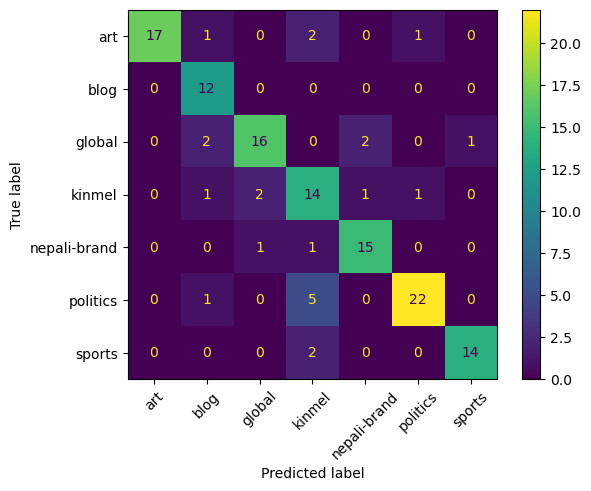

In [83]:
cm = confusion_matrix(y_test, svm_pred, labels=svm_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svm_model.classes_)

disp.plot(xticks_rotation=45)
plt.show()


# 7. - Build a simple inference pipeline for prediction.
This allows us to predict category for new Nepali news text.

In [84]:
import re
import joblib

### 7.1- Data Cleaning

In [91]:
NEPALI_STOPWORDS =set(stopwords.words('nepali'))
print(NEPALI_STOPWORDS)

{'कसरी', 'पाँचौं', 'जान', 'आदि', 'एकदम', 'पाँच', 'तिर', 'बरु', 'रूप', 'गर्नुपर्छ', 'पटक', 'छ', 'देखि', 'भन्नुभयो', 'कहिलेकाहीं', 'गर्छ', 'सट्टा', 'जस्तो', 'अनुसार', 'यद्यपि', 'जाहिर', 'बिरुद्ध', 'कसैले', 'बारे', 'तुरुन्तै', 'नजिकै', 'सही', 'दिनुहुन्छ', 'कृपया', 'पछिल्लो', 'यसपछि', 'गर्नु', 'यो', 'अन्तर्गत', 'यस', 'उहालाई', 'कसै', 'गए', 'तिनी', 'दिनुभएको', 'माथि', 'सबै', 'हरेक', 'एक', 'कि', 'निम्ति', 'सायद', 'अरु', 'अन्यथा', 'अर्थात', 'तिमी', 'निम्न', 'पछि', 'ओठ', 'कुरा', 'दुई', 'को', 'जस्तोसुकै', 'देखे', 'दिए', 'मुख्य', 'चाहिए', 'बीच', 'तथा', 'प्रति', 'हुने', 'कहाँबाट', 'आफूलाई', 'देखियो', 'मलाई', 'देखेको', 'तदनुसार', 'र', 'यसो', 'यसरी', 'हुन', 'हुन्', 'भने', 'तेस्कारण', 'उनले', 'आए', 'आत्म', 'तल', 'न', 'आफ्नै', 'कम से कम', 'तिनिहरुलाई', 'राखे', 'अर्थात्', 'अलग', 'राख्छ', 'का', 'सबैलाई', 'थियो', 'चार', 'नि', 'थिएन', 'नयाँ', 'राम्रो', 'तिनीहरुको', 'आयो', 'उदाहरण', 'तिनीहरू', 'बिशेष', 'भएको', 'वरीपरी', 'सधै', 'रही', 'भर', 'संगै', 'चाले', 'कुनै', 'पूर्व', 'धेरै', 'चाहन्छु', 'बीचमा', 'नत्र

In [92]:
def clean_nepali_text(text):
    text = str(text)

    # remove English letters & digits
    text = re.sub(r"[a-zA-Z0-9]", "", text)

    # keep only Nepali unicode
    text = re.sub(r"[^\u0900-\u097F\s]", "", text)

    tokens = text.split()
    tokens = [w for w in tokens if w not in NEPALI_STOPWORDS]

    return " ".join(tokens)

### 7.2 - save the model & tfidf 

In [93]:
# use this when making streamlit app

joblib.dump(svm_model, "news_svm_model.pkl")  
joblib.dump(tfidf, "tfidf_vectorizer.pkl")
print(" Model & vectorizer saved")


 Model & vectorizer saved


In [94]:
#load the model (in vs code to deploy or make streamkit app)

# svm_model = joblib.load("news_svm_model.pkl")
# tfidf = joblib.load("tfidf_vectorizer.pkl")


## 7.3 - Prediction Function (CORE PIPELINE)

In [95]:
def predict_news_category(news_text):
    cleaned_text = clean_nepali_text(news_text)
    vector = tfidf.transform([cleaned_text])
    prediction = svm_model.predict(vector)
    return prediction[0]


In [96]:
news_1 = """
सरकारले आगामी आर्थिक वर्षका लागि नयाँ बजेट सार्वजनिक गरेको छ।
"""

news_2 = """
नेपालले अन्तर्राष्ट्रिय क्रिकेट प्रतियोगितामा शानदार जित हासिल गरेको छ।
"""

print("Prediction 1:", predict_news_category(news_1))
print("Prediction 2:", predict_news_category(news_2))


Prediction 1: kinmel
Prediction 2: sports
